In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import pickle
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
df = pd.read_csv('Dataset of Diabetes .csv')

In [3]:
# Check for missing values
print(df.isnull().sum())

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [4]:
# Encode categorical variables
encode = LabelEncoder()
df['new_gender'] = encode.fit_transform(df['Gender'])
df['new_class'] = encode.fit_transform(df['CLASS'])


In [5]:
# Drop unnecessary columns
df.drop(['Gender', 'CLASS', 'ID'], axis=1, inplace=True)

In [6]:
# Normalize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop(['new_class'], axis=1))


In [7]:
# Split the data into features and target
x = x_scaled
y = df['new_class']

In [8]:
x

array([[-0.07474738, -0.40114429, -0.14478078, ..., -0.369958  ,
        -1.12462205, -1.13968756],
       [-0.06993954, -3.13001704, -0.21295413, ..., -0.34264878,
        -1.32623876,  0.87034341],
       [-0.06586919, -0.40114429, -0.14478078, ..., -0.369958  ,
        -1.12462205, -1.13968756],
       ...,
       [-0.0541266 , -2.67520491,  0.67329948, ...,  1.70554268,
        -0.43912523,  0.87034341],
       [-0.07296316, -1.76558067,  0.23017268, ...,  3.31678663,
         2.2020537 ,  0.87034341],
       [-0.07294836,  0.05366783, -0.04252074, ..., -0.31533956,
         0.68992836,  0.87034341]])

In [9]:
# Oversample the minority class
ros = RandomOverSampler(random_state=20)
x_res, y_res = ros.fit_resample(x, y)



In [10]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.30, random_state=50)

In [27]:
x_train

array([[-0.07148228, -0.40114429, -0.14478078, ..., -0.26072112,
        -1.12462205,  0.87034341],
       [-0.06993363, -1.76558067,  0.33243271, ..., -0.28803034,
        -1.00365203,  0.87034341],
       [-0.06993363, -1.76558067,  0.33243271, ..., -0.28803034,
        -1.00365203,  0.87034341],
       ...,
       [-0.07405311, -0.40114429, -0.1106941 , ..., -0.34264878,
        -2.13270561,  0.87034341],
       [-0.06993363, -1.76558067,  0.33243271, ..., -0.28803034,
        -1.00365203,  0.87034341],
       [-0.06993363, -1.76558067,  0.33243271, ..., -0.28803034,
        -1.00365203,  0.87034341]])

In [11]:
# Train a logistic regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_lr_pred = lr.predict(x_test)
print(classification_report(y_test, y_lr_pred))
print(confusion_matrix(y_test, y_lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       250
           1       0.90      1.00      0.95       239
           2       0.86      0.95      0.90       256
           3       0.98      0.86      0.92       257
           4       0.95      1.00      0.97       258

    accuracy                           0.93      1260
   macro avg       0.93      0.93      0.93      1260
weighted avg       0.93      0.93      0.93      1260

[[208  13  27   2   0]
 [  0 239   0   0   0]
 [  0  11 242   3   0]
 [  6   2  12 222  15]
 [  0   0   0   0 258]]


c:\Users\HP\.conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Train a K-nearest neighbors model
knc = KNeighborsClassifier(n_neighbors=7)
knc.fit(x_train, y_train)
y_knc_pred = knc.predict(x_test)
print(classification_report(y_test, y_knc_pred))
print(confusion_matrix(y_test, y_knc_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       250
           1       0.98      1.00      0.99       239
           2       0.92      1.00      0.96       256
           3       1.00      0.88      0.93       257
           4       0.96      1.00      0.98       258

    accuracy                           0.96      1260
   macro avg       0.96      0.96      0.96      1260
weighted avg       0.96      0.96      0.96      1260

[[235   5  10   0   0]
 [  0 239   0   0   0]
 [  0   0 256   0   0]
 [ 10   0  12 225  10]
 [  0   0   0   0 258]]


In [13]:
# Training random forest model
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_rfc_pred = rfc.predict(x_test)
print(classification_report(y_test, y_rfc_pred))
print(confusion_matrix(y_test, y_rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       250
           1       1.00      1.00      1.00       239
           2       1.00      1.00      1.00       256
           3       1.00      0.98      0.99       257
           4       0.99      1.00      0.99       258

    accuracy                           1.00      1260
   macro avg       1.00      1.00      1.00      1260
weighted avg       1.00      1.00      1.00      1260

[[250   0   0   0   0]
 [  0 239   0   0   0]
 [  0   0 256   0   0]
 [  3   0   0 251   3]
 [  0   0   0   0 258]]


In [14]:
# Saving my model
import joblib
joblib.dump(rfc, 'rfc_model.joblib')



['rfc_model.joblib']

In [15]:
# saving it in a file
rfc_loaded = joblib.load('rfc_model.joblib')

In [16]:
error_rate=[]
for i in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_test, y_test)
    pred_i = rfc.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error_rate')

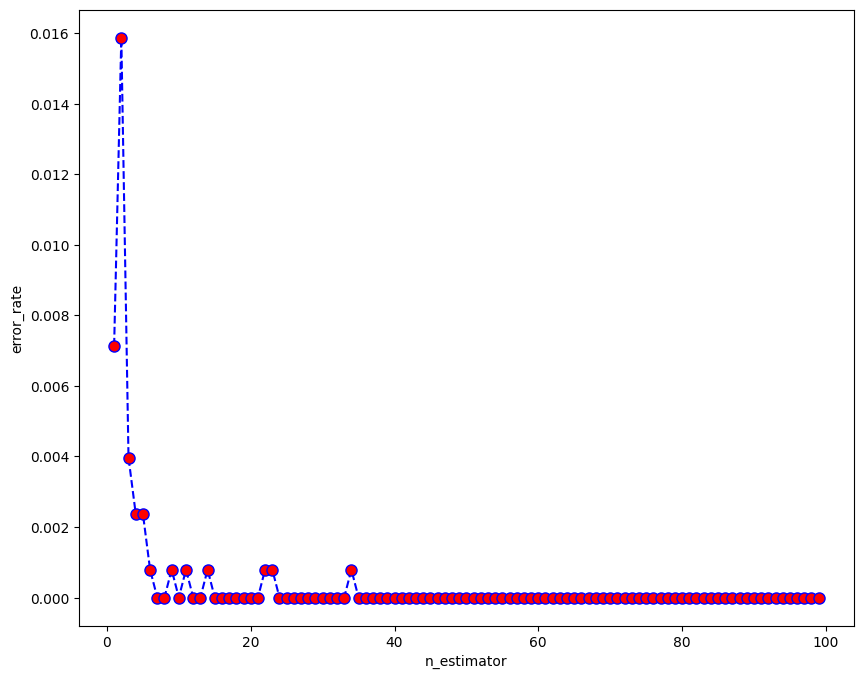

In [17]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 100), error_rate, marker='o', markersize=8, markerfacecolor='red', color='blue', linestyle='dashed')
plt.xlabel('n_estimator')
plt.ylabel('error_rate')

In [18]:
# Train a decision tree model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_dtc_pred = dtc.predict(x_test)
print(classification_report(y_test, y_dtc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       250
           1       1.00      1.00      1.00       239
           2       1.00      1.00      1.00       256
           3       1.00      0.96      0.98       257
           4       0.97      1.00      0.99       258

    accuracy                           0.99      1260
   macro avg       0.99      0.99      0.99      1260
weighted avg       0.99      0.99      0.99      1260



In [19]:
# Train a support vector machine model
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train, y_train)
y_svm_pred = classifier.predict(x_test)
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       250
           1       1.00      1.00      1.00       239
           2       0.96      1.00      0.98       256
           3       1.00      0.87      0.93       257
           4       0.95      1.00      0.98       258

    accuracy                           0.97      1260
   macro avg       0.97      0.97      0.97      1260
weighted avg       0.97      0.97      0.97      1260



In [20]:
# Save the trained model
pickle.dump(classifier, open('peace_modelD.pkl', 'wb'))


In [21]:
# Load the saved model
file = pickle.load(open('peace_modelD.pkl', 'rb'))


In [22]:
# Make a prediction
input_data = (17975, 50, 4.7, 46, 4.9, 4.2, 0.9, 2.4, 1.4, 0.5, 24.0, 0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = file.predict(input_data_reshaped)
print(prediction)


[0]


In [23]:
if prediction == 0:
    print('The person is not diabetes')
elif prediction == 1:
    print('The person is diabetes')
elif prediction == 2:
    print('Predicted diabetes')
else:
    print('Mixed prediction')

The person is not diabetes


In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np

Text(0.5, 1.0, 'Learning Curve')

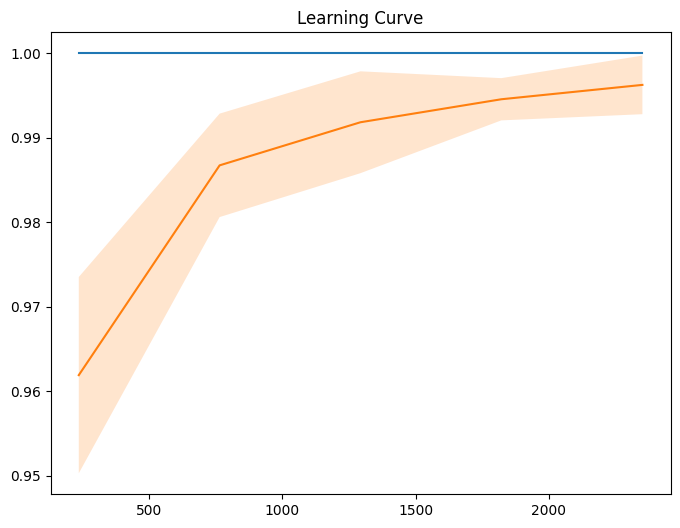

In [25]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    dtc, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve')

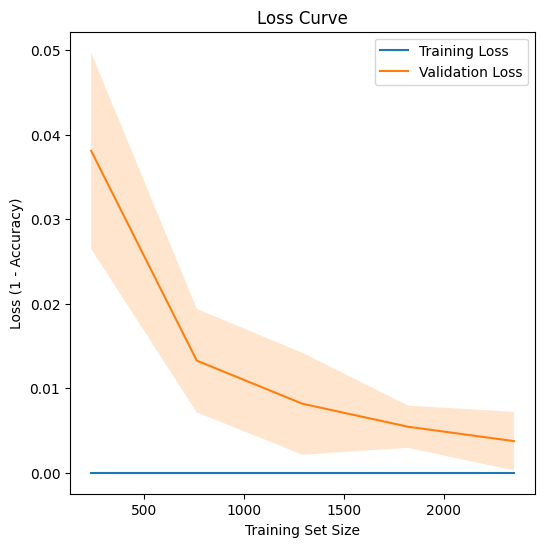

In [26]:
# Loss Curve
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, 1 - train_mean, label='Training Loss')
plt.fill_between(train_sizes, 1 - train_mean + train_std, 1 - train_mean - train_std, alpha=0.2)
plt.plot(train_sizes, 1 - test_mean, label='Validation Loss')
plt.fill_between(train_sizes, 1 - test_mean + test_std, 1 - test_mean - test_std, alpha=0.2)
plt.title('Loss Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Loss (1 - Accuracy)')
plt.legend()
plt.show()

In [1]:
import streamlit
streamlit.__version__

'1.33.0'

In [2]:
import joblib
print(joblib.__version__)

1.4.2


In [3]:
import numpy
numpy.__version__

'1.23.5'

In [13]:
import sklearn
sklearn.show_versions()



System:
    python: 3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]
executable: c:\Users\HP\.conda\envs\myenv\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.3.2
          pip: 23.3.1
   setuptools: 68.2.2
        numpy: 1.23.5
        scipy: 1.10.1
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.7.5
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 4
         prefix: libopenblas
       filepath: C:\Users\HP\.conda\envs\myenv\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
        version: 0.3.20
threading_layer: pthreads
   architecture: Haswell

       user_api: openmp
   internal_api: openmp
    num_threads: 4
         prefix: vcomp
       filepath: C:\Users\HP\.conda\envs\myenv\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None

       user_api: 

In [6]:
import pandas
pandas.__version__

'2.0.3'

In [8]:
import matplotlib
matplotlib.__version__

'3.7.5'

import seaborn
seaborn.__version__


In [10]:
import imblearn

imblearn.__version__

'0.12.3'

In [11]:
import scipy
scipy.__version__

'1.10.1'

In [24]:
import pkg_resources

# Check scikit-learn version
print("Scikit-learn version:", sklearn.__version__)
import sys

print("Python version:", sys.version)




Scikit-learn version: 1.3.2
Python version: 3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]
